In [2]:
#To import required libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
#To read the csv file & print first few rows & columns
inst = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(inst.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [6]:
#let's look at whether the dataset contains any missing/null values or not
inst.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
#to check the datatype of all the columns
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-9-b868f8adb606>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inst['From Home'])


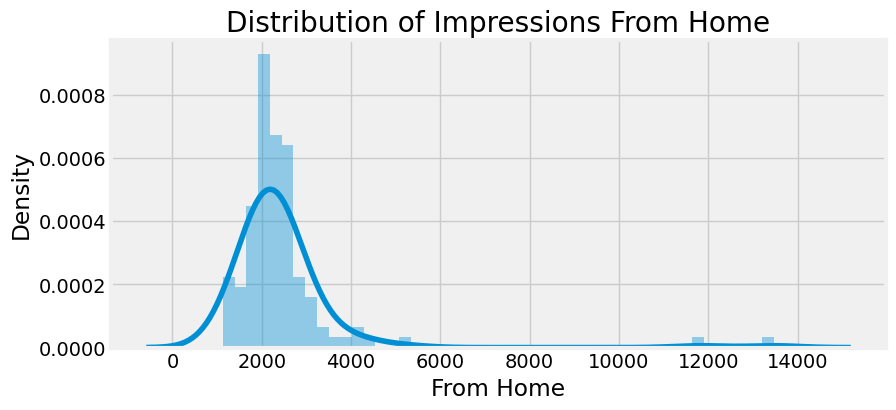

In [9]:
#Plots
#to look at the distribution of impressions I have received from home
plt.figure(figsize=(10,4))
plt.title("Distribution of Impressions From Home")
sns.distplot(inst['From Home'])
plt.show()

<ipython-input-13-157cbbc19932>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inst['From Hashtags'])


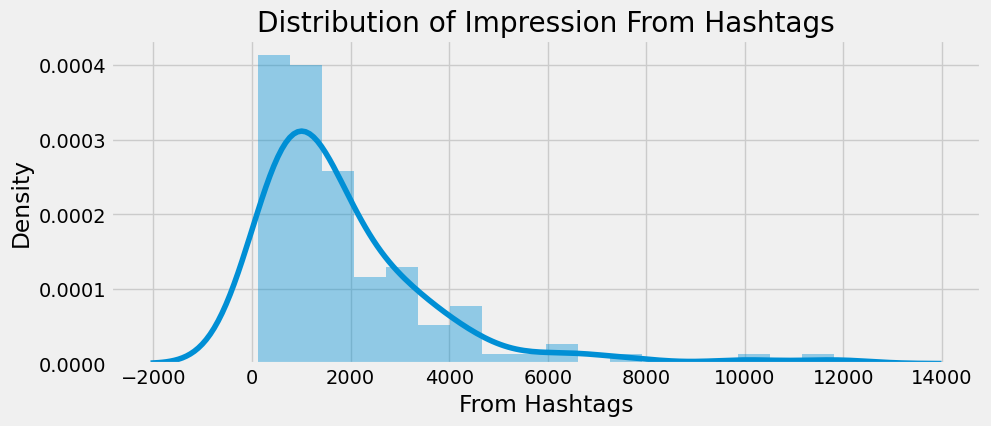

In [13]:
#to view impression recieved from hastags
plt.figure(figsize=(10,4))
plt.title("Distribution of Impression From Hashtags")
sns.distplot(inst['From Hashtags'])
plt.show()

<ipython-input-14-d42750a67819>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inst['From Explore'])


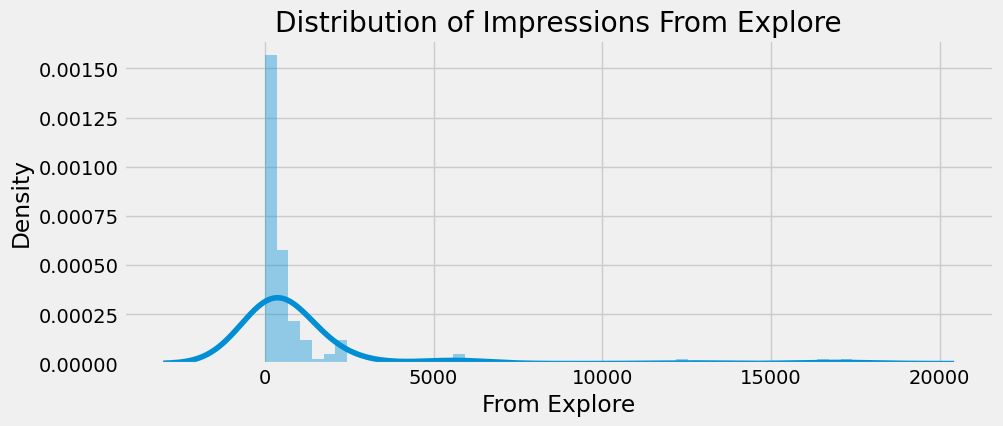

In [14]:
#to view impression from explore
plt.figure(figsize=(10,4))
plt.title("Distribution of Impressions From Explore")
sns.distplot(inst['From Explore'])
plt.show()

In [15]:
#Now, let's look at the percentage of impressions I get from various sources on instagram
home = inst["From Home"].sum()
explore = inst["From Explore"].sum()
hashtags = inst["From Hashtags"].sum()
other = inst["From Other"].sum()

labels = ['From Home', 'From Explore', 'From Hashtags', 'From Other']
values = [home, explore, hashtags, other]

fig = px.pie(inst, values=values, names=labels, title = 'Impressions on Instagram Posts from Various Sources', hole = 0.5)
fig.show()

**The above Donut plot shows that almost 45% of the reach is from my followers, 33.6% is from hashtags, 19.2% is from explore section & 3.05% is from other sources.**

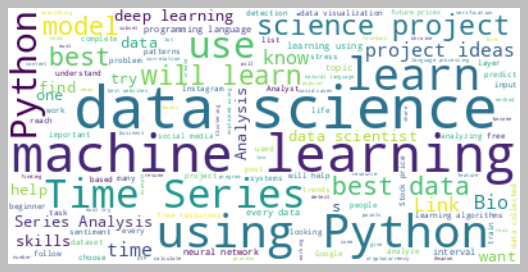

In [16]:
#Now let's analyze the content of my instagram posts with the help of two columns i.e. caption & hashtags
#to look at the most used words in caption, let's create wordcloud of the caption columns
text = " ".join(i for i in inst.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = "white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(10,4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

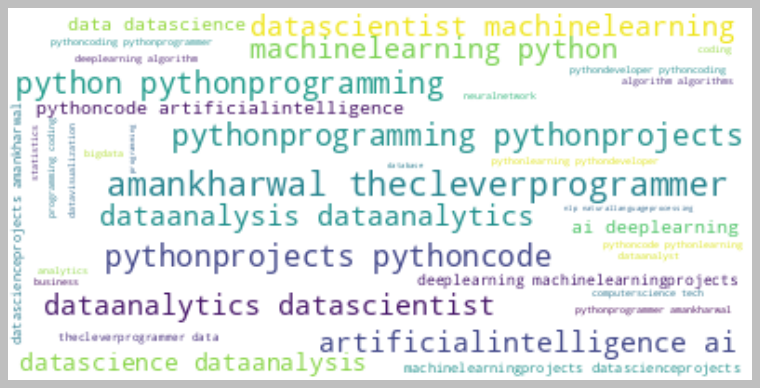

In [20]:
#to look at the most used words in hashtags, let's create wordcloud of the hashtags columns
text = " ".join(i for i in inst.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#To analyze relationship between no. of likes & no. of impressions on my instagram posts
fig = px.scatter(inst, x="Impressions", y="Likes", size="Likes",trendline="ols",title="Relationship between Likes & Impressions")
fig.show()

In [22]:
#To analyze relationship between no. of comments & no. of impressions on my instagram posts
fig = px.scatter(inst, x="Impressions", y="Likes", size="Comments",trendline="ols",title="Relationship between Comments & Impressions")
fig.show()

In [23]:
#To analyze relationship between no. of shares & no. of impressions on my instagram posts
fig = px.scatter(inst, x="Impressions", y="Shares", size="Shares",trendline="ols",title="Relationship between Shares & Impressions")
fig.show()

In [27]:
#To analyze relationship between no. of saves & no. of impressions on my instagram posts
fig = px.scatter(inst, x="Impressions", y="Saves",size="Saves", trendline="ols",title="Relationship between Post Saves & Total Impressions")
fig.show()

In [28]:
#To look at the correlation of all the columns with the Impressions column
correlation = inst.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-28-8e96fa2ecb22>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.**

In [29]:
#Analyzing Conversion Rate
#In Instagram, conversation rate means how many followers you are getting from the number of profile visits
#from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.
#Now let’s have a look at the conversation rate of my Instagram account

conversion_rate = (inst["Follows"].sum() / inst["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


**So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate.**

In [31]:
#To view the relationship between total profile visits & number of followers gained from all profile visits
fig = px.scatter(inst, x="Profile Visits", y="Follows", size = "Follows", trendline = "ols", title = "Relationship between Profile Vists & Followers Gained")
fig.show()

In [50]:
#Now it's time to predict instagram reach using ML Model
#For that let's first split the data into training & testing sets:
X=np.array(inst[['Likes','Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y=np.array(inst['Impressions'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 85)

In [51]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8375849544396647